In [8]:
from adaptive import Learner1D, runner
from adaptive.learner.learner1D import curvature_loss_function
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
data = np.loadtxt("cebaf_1pass_55mev_wirescan.csv")

In [5]:
def fitfunc(x, a1, x1, sigma1, a2, x2, sigma2):
    return 0.5 + 10000 * a1 * np.exp(-0.5 * (x-x1)**2/sigma1**2) + 10000 * a2 * np.exp(-0.5 * (x-x2)**2/sigma2**2)

p0 = [5, -48, 1, 6, -35, 1]
popt, covp = optimize.curve_fit(fitfunc, data[:, 0], data[:, 1], p0)
print (popt)

[  5.74717931 -48.18231017   0.96044874   7.23356741 -34.41679858
   0.85391621]


In [25]:
def interpolate_data(a1, x1, sigma1):
    def plotfunc(x, a1, x1, sigma1):
        return 0.5 + 10000 * a1 * np.exp(-0.5 * (x-x1)**2/sigma1**2)
    
    learner = Learner1D(lambda x : np.log(plotfunc(x, a1, x1, sigma1)), (-66, -19), loss_per_interval=curvature_loss_function())
    goal = lambda x : x.loss() < 1e-3
    runner.simple(learner, goal)
    
    plot_data = np.array(list(learner.data.items()))
    sorted_data = plot_data[np.argsort(plot_data[:, 0])]
    sorted_data[:, 1] = np.exp(sorted_data[:, 1])
    
    print (sorted_data.shape)
    return sorted_data

fit1 = interpolate_data(popt[0], popt[1], popt[2])
fit2 = interpolate_data(popt[3], popt[4], popt[5])

(254, 2)
(251, 2)


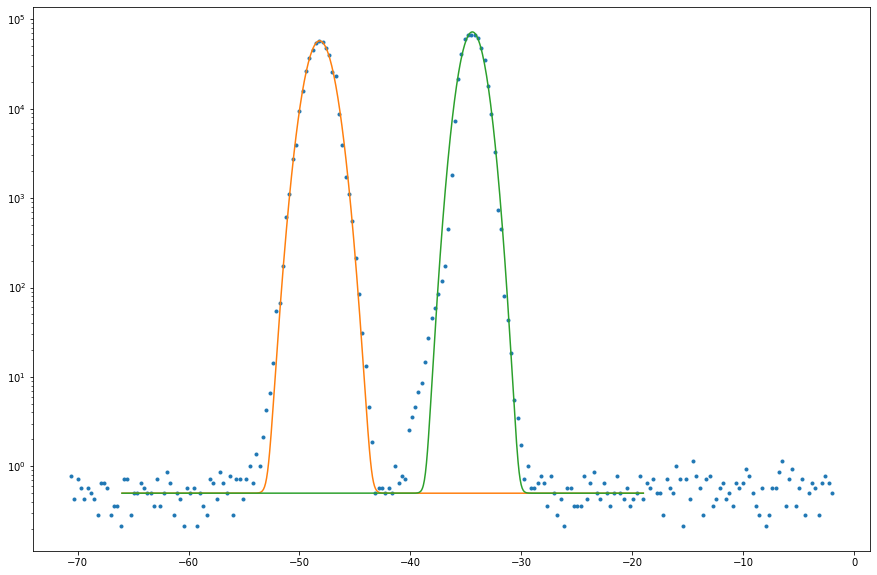

In [26]:
plt.figure(figsize=(15, 10))
plt.semilogy(data[:,0], data[:,1], '.')
plt.semilogy(fit1[:,0], fit1[:,1], '-')
plt.semilogy(fit2[:,0], fit2[:,1], '-')

np.savetxt("cebaf_1pass_55mev_wirescan.f1", fit1)
np.savetxt("cebaf_1pass_55mev_wirescan.f2", fit2)